Samplerate: 48000


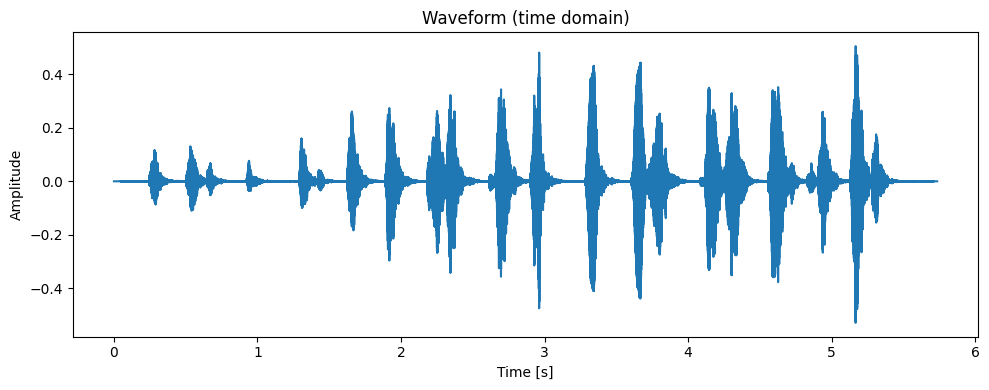

In [7]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython import display

# exc 1

file_name = "2776.mp3"  # Source: https://bigsoundbank.com/detail-2776-cockatiel-parakeet-8.html
url = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name}"
urllib.request.urlretrieve(url, file_name)


sound_data, samplerate = librosa.load(file_name, sr=None)
print("Samplerate:", samplerate)

# play audio
display.display(display.Audio(data=sound_data, rate=samplerate))

# time-domain plot
t = np.arange(len(sound_data)) / samplerate
plt.plot(t, sound_data)
plt.xlabel("Time [s]"); plt.ylabel("Amplitude")
plt.title("Waveform (time domain)")
plt.tight_layout(); plt.show()



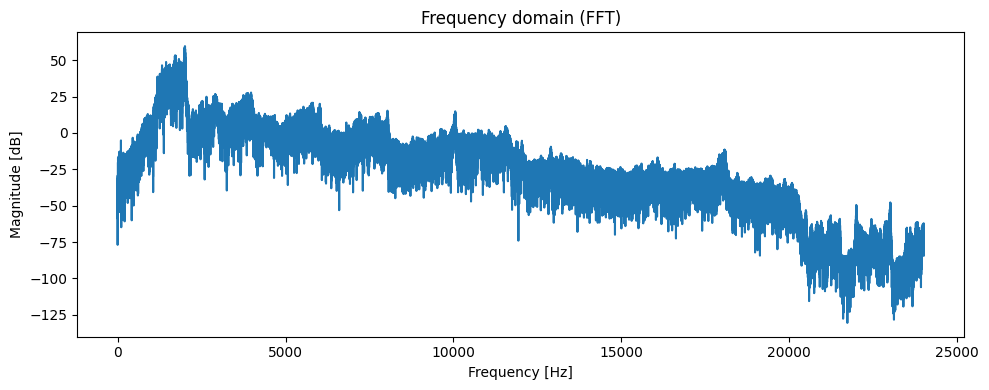

In [8]:
# exc 2
# window to reduce leakage 
win = np.hanning(len(sound_data))
xw = sound_data * win


X = np.fft.rfft(xw)
freqs = np.fft.rfftfreq(len(xw), d=1/samplerate)

# magnitude (dB)
mag_db = 20*np.log10(np.maximum(np.abs(X), 1e-12))

plt.plot(freqs, mag_db)
plt.xlabel("Frequency [Hz]"); plt.ylabel("Magnitude [dB]")
plt.title("Frequency domain (FFT)")
plt.tight_layout(); plt.show()



Samplerate (sample 2): 48000


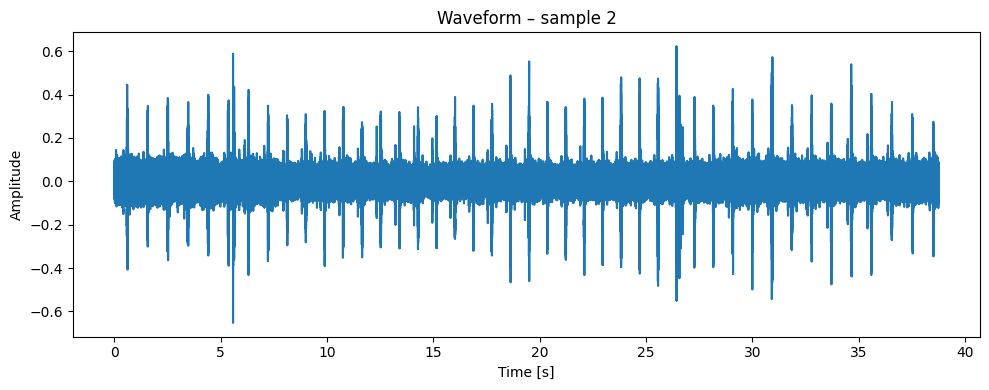

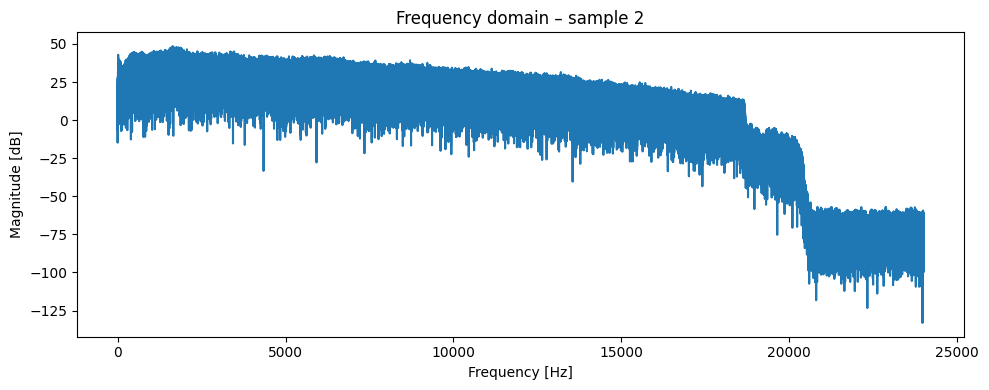

In [11]:
#ex 3
file_name2 = "0703.mp3"  #other sound
url2 = f"https://bigsoundbank.com/UPLOAD/mp3/{file_name2}"
urllib.request.urlretrieve(url2, file_name2)

x2, sr2 = librosa.load(file_name2, sr=None)
print("Samplerate (sample 2):", sr2)
display.display(display.Audio(data=x2, rate=sr2))

t2 = np.arange(len(x2)) / sr2
plt.plot(t2, x2)
plt.xlabel("Time [s]"); plt.ylabel("Amplitude")
plt.title("Waveform – sample 2")
plt.tight_layout(); plt.show()

win2 = np.hanning(len(x2))
X2 = np.fft.rfft(x2 * win2)
f2 = np.fft.rfftfreq(len(x2), d=1/sr2)
mag2_db = 20*np.log10(np.maximum(np.abs(X2), 1e-12))

plt.plot(f2, mag2_db)
plt.xlabel("Frequency [Hz]"); plt.ylabel("Magnitude [dB]")
plt.title("Frequency domain – sample 2")
plt.tight_layout(); plt.show()



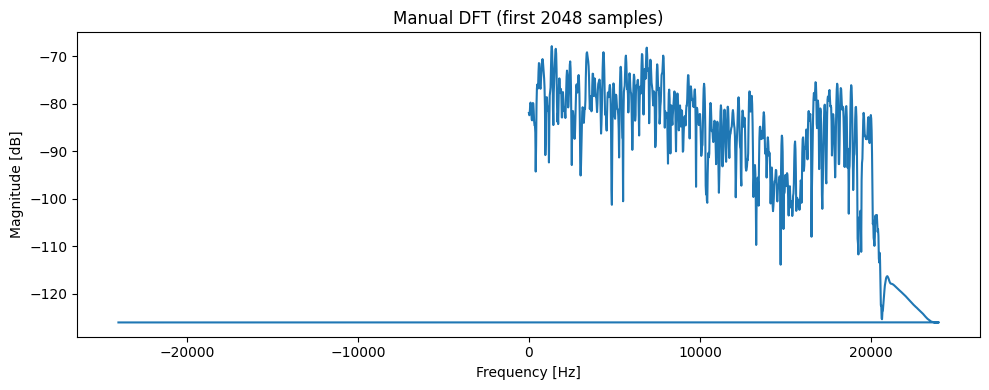

In [12]:
# exc 4
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j*np.pi*k*n/N)
    return W @ x

# compute DFT on first 2048 samples (faster)
Ntest = 2048
x_short = sound_data[:Ntest]
X_dft = dft(x_short)
freqs_dft = np.fft.fftfreq(Ntest, d=1/samplerate)[:Ntest//2+1]
mag_dft_db = 20*np.log10(np.maximum(np.abs(X_dft[:Ntest//2+1]), 1e-12))

plt.plot(freqs_dft, mag_dft_db)
plt.xlabel("Frequency [Hz]"); plt.ylabel("Magnitude [dB]")
plt.title("Manual DFT (first 2048 samples)")
plt.tight_layout(); plt.show()




In [6]:
# Analysis

# In the time domain plots we see the waveform of the sounds.  
# The FFT shows strong peaks at certain frequencies, which are the dominant tones.  
# The second sample has different peaks, so the sound content is different.  
# The windowing (Hann window) makes the spectrum cleaner and reduces leakage.  
# With the manual DFT we can see the same result, but it is slower.